In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
import os
import lvm_read
from datetime import datetime


In [33]:

Day = "21"
Month_year = "July23"

# Folder path
folder_path = r"G:\Shared drives\EGR-MNE-FAST Research Group-ExperimentalData\Projects\additive_manufacturing\projects\thermal_conductivity\Data\Ethans Data\21July2023_ThermalConductivity_StainlessSteel_NonChanneled"

# List xlsx files in the folder
xlsx_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".xlsx")]
xlsx_files.reverse()
# Lists to store averages
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []

for file_path in xlsx_files:
    try:
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)

        # TC1-4
        TC_1_4 = ["TC1", "TC2", "TC3", "TC4"]
        TC_1_4_AVG = df[TC_1_4].mean().mean().round(3)
        TC_Group_1_AVG.append(TC_1_4_AVG)

        # TC5-8
        TC_5_8 = ["TC5", "TC6", "TC7", "TC8"]
        TC_5_8_AVG = df[TC_5_8].mean().mean().round(3)
        TC_Group_2_AVG.append(TC_5_8_AVG)

        # TC10-13
        TC_10_13 = ["TC10", "TC11", "TC12", "TC13"]
        TC_10_13_AVG = df[TC_10_13].mean().mean().round(3)
        TC_Group_3_AVG.append(TC_10_13_AVG)

        # Time
        time_str = df['Time'].iloc[0].strftime('%H:%M:%S.%f')[:-3]
        dummy_date_str = '1970-01-01'
        time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
        total_seconds = (time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second + (time_obj.microsecond / 1000000)
        total_hours = total_seconds/3600



        Time_Group.append(total_hours)

    except Exception as e:
        print(f"Error processing file: {file_path}, Error: {e}")
#adjusting time scale
First = Time_Group[0]
Time_From_0 = [round(x - First, 2) for x in Time_Group]

# Create DataFrame
data = {
    "Time": Time_From_0,
    "G1TAverage": TC_Group_1_AVG,
    "G2TAverage": TC_Group_2_AVG,
    "G3TAverage": TC_Group_3_AVG
}
T_avg_chart = pd.DataFrame(data)
T_avg_chart


,Time,G1TAverage,G2TAverage,G3TAverage
0,0.00,21.994,22.154,11.176
1,0.30,61.437,37.439,10.523
2,0.70,78.383,58.406,16.429
3,0.95,83.982,65.533,17.755
4,1.37,88.415,72.550,19.094
5,1.63,89.488,75.077,19.812
6,1.80,89.940,76.102,20.127
7,1.97,90.226,76.743,20.488
8,2.14,90.417,77.140,20.362
9,2.31,90.482,77.315,20.680


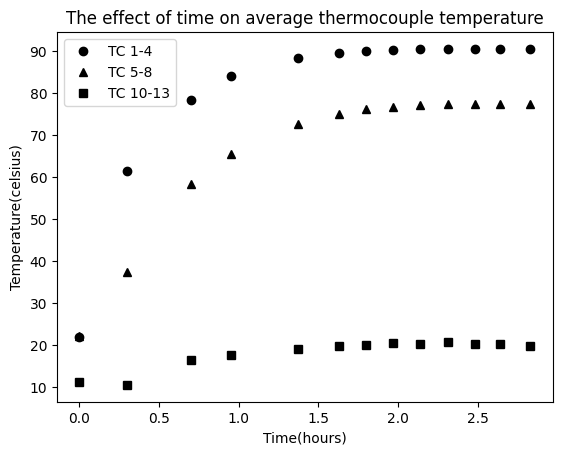

In [34]:
#varialable setup
y1 = T_avg_chart['G1TAverage']
y2 = T_avg_chart['G2TAverage']
y3 = T_avg_chart['G3TAverage']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()
T_vs_time = plt.gca()

In [35]:
SD_1_T = []
SD_2_T = []
SD_3_T = []

for file in xlsx_files:
    TC_AVG_1_4 = []
    TC_AVG_5_8 = []
    TC_AVG_10_13 = []
    df = pd.read_excel(file)

    for i in range(1, 5):
        TC = df[f"TC{i}"].mean()
        TC_AVG_1_4.append(TC)

    for i in range(5, 9):
        TC = df[f"TC{i}"].mean()
        TC_AVG_5_8.append(TC)

    for i in range(10, 14):
        TC = df[f"TC{i}"].mean()
        TC_AVG_10_13.append(TC)

    SD_1_T.append(np.std(TC_AVG_1_4))
    SD_2_T.append(np.std(TC_AVG_5_8))
    SD_3_T.append(np.std(TC_AVG_10_13))

data = {
    "Time": Time_From_0,
    "G1Average": SD_1_T,
    "G2Average": SD_2_T,
    "G3Average": SD_3_T
}
Standard_deviation = pd.DataFrame(data)
Standard_deviation


,Time,G1Average,G2Average,G3Average
0,0.00,0.105983,0.253760,1.252956
1,0.30,2.335493,0.497034,1.141808
2,0.70,2.917090,0.840900,2.421491
3,0.95,2.664741,0.894334,3.280061
4,1.37,1.892602,0.935474,1.142256
5,1.63,1.651134,1.035912,1.436450
6,1.80,1.579073,1.047705,1.758611
7,1.97,1.528083,1.019285,2.014292
8,2.14,1.486133,0.994470,2.021746
9,2.31,1.455651,0.993618,1.778779


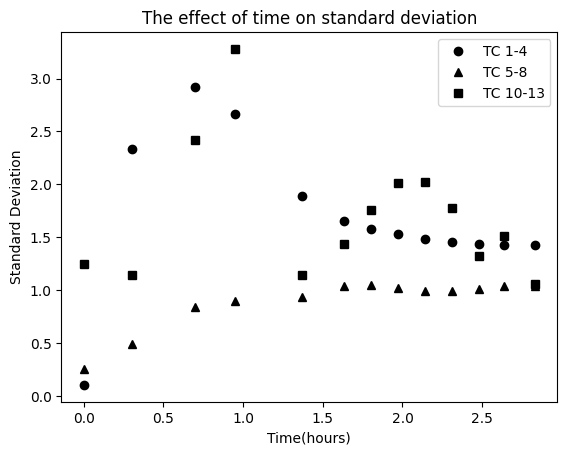

In [36]:
#varialable setup
y1 = Standard_deviation['G1Average']
y2 = Standard_deviation['G2Average']
y3 = Standard_deviation['G3Average']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Standard Deviation")
plt.title("The effect of time on standard deviation")
plt.legend()
SD_vs_time = plt.gca()

In [37]:
DT_SS_tot = []
DT_PG_tot = []
K = []

for i in range(len(T_avg_chart)):
    DT_1 = T_avg_chart.at[i, "G1TAverage"] - T_avg_chart.at[i, "G2TAverage"]
    DT_2 = T_avg_chart.at[i, "G2TAverage"] - T_avg_chart.at[i, "G3TAverage"]
    stuff = ((DT_2 / 0.0175) * (0.0238 / DT_1)) * 0.18
    K.append(round(stuff, 3))

data = {
    "Time": Time_From_0,
    "Thermal Conductivity": K
}
Thermal_conductivity = pd.DataFrame(data)
Thermal_conductivity


,Time,Thermal Conductivity
0,0.00,-16.796
1,0.30,0.275
2,0.70,0.514
3,0.95,0.634
4,1.37,0.825
5,1.63,0.939
6,1.80,0.990
7,1.97,1.021
8,2.14,1.047
9,2.31,1.053


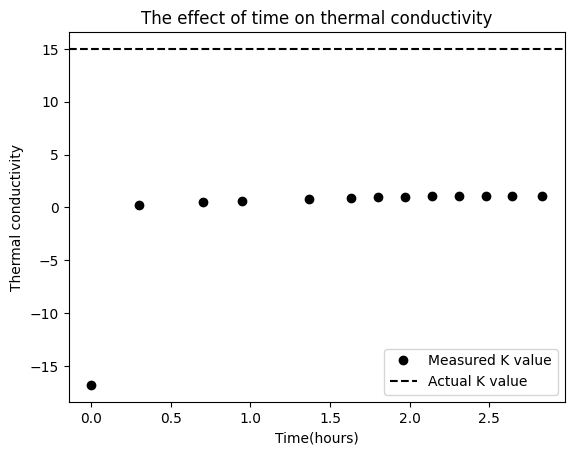

In [38]:
#varialable setup
y1 = Thermal_conductivity['Thermal Conductivity']
y2 = 15

#graph setup
plt.plot(Time_From_0,y1,'o',label="Measured K value", color=("black"))
#plt.plot(Time_From_0,y2, "-", label="Actual K value", color=("black"))
plt.axhline(y = 15, color = 'black', linestyle = '--', label="Actual K value")
plt.xlabel('Time(hours)')
plt.ylabel("Thermal conductivity")
plt.title("The effect of time on thermal conductivity")
plt.legend()
K_vs_time = plt.gca()

In [39]:
save = False
list_1 = ["_average_temperature","_standard_deviation","_thermal_conductivity"]
mist = [T_avg_chart,Standard_deviation,Thermal_conductivity]


if save == True:
    Charts_folder_path = r"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year
    os.makedirs(Charts_folder_path)
    x = 0
    for i in list_1:
            
            var = mist[x]
            
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.csv"
            var.to_csv(save_folder, index=False, header=True)
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.xlsx"
            var.to_excel(save_folder, index=False, header=True)
            x +=1


list_2 = ["_average_temperature_vs_time","_standard_deviation_vs_time","_thermal_conductivity_vs_time"]
bist = [T_vs_time,SD_vs_time,K_vs_time]

if save == True:
    Graphs_folder_path = r"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\Data\\Ethans Data\\Graphs\\"+Day+ Month_year
    os.makedirs(Graphs_folder_path)
    x = 0 
    for i in list_2:
            var = bist[x]
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Graphs\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.png"
            var.figure.savefig(save_folder, format='pdf')
            x += 1